In [720]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


In [721]:
# Load dataset
file_path = './HousingDataMerged.csv'
housing_data = pd.read_csv(file_path)

In [722]:
# identifying the missing data
missing_values = housing_data.isnull().sum()

print(missing_values)

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


In [723]:
housing_data.Date = pd.to_datetime(housing_data.Date)

print(housing_data.head())

         Suburb            Address  Rooms Type    Price Method   SellerG  \
0     Gowanbrae     1 Gowanbrae Dr      3    h   631000      S    Nelson   
1  Malvern East      1/13 Goode St      3    h  1210000      S  Marshall   
2    Hughesdale    1/13 Swindon Rd      2    u   516000      S       Ray   
3     Reservoir  1/147 Purinuan Rd      2    u   415000     PI       Ray   
4     Reservoir  1/21 Dumbarton St      3    u   475000      S       Ray   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0 2016-09-03      13.6      3043  ...         2    2       608         138.0   
1 2016-09-03      11.2      3145  ...         2    1       337         146.0   
2 2016-09-03      13.0      3166  ...         1    1         0          76.0   
3 2016-09-03      11.2      3073  ...         1    1       189          84.0   
4 2016-09-03      11.2      3073  ...         1    1       191         107.0   

   YearBuilt           CouncilArea Lattitude  Longtitude  \
0 

/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_9441/3864443684.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  housing_data.Date = pd.to_datetime(housing_data.Date)


/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_9441/103017353.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])


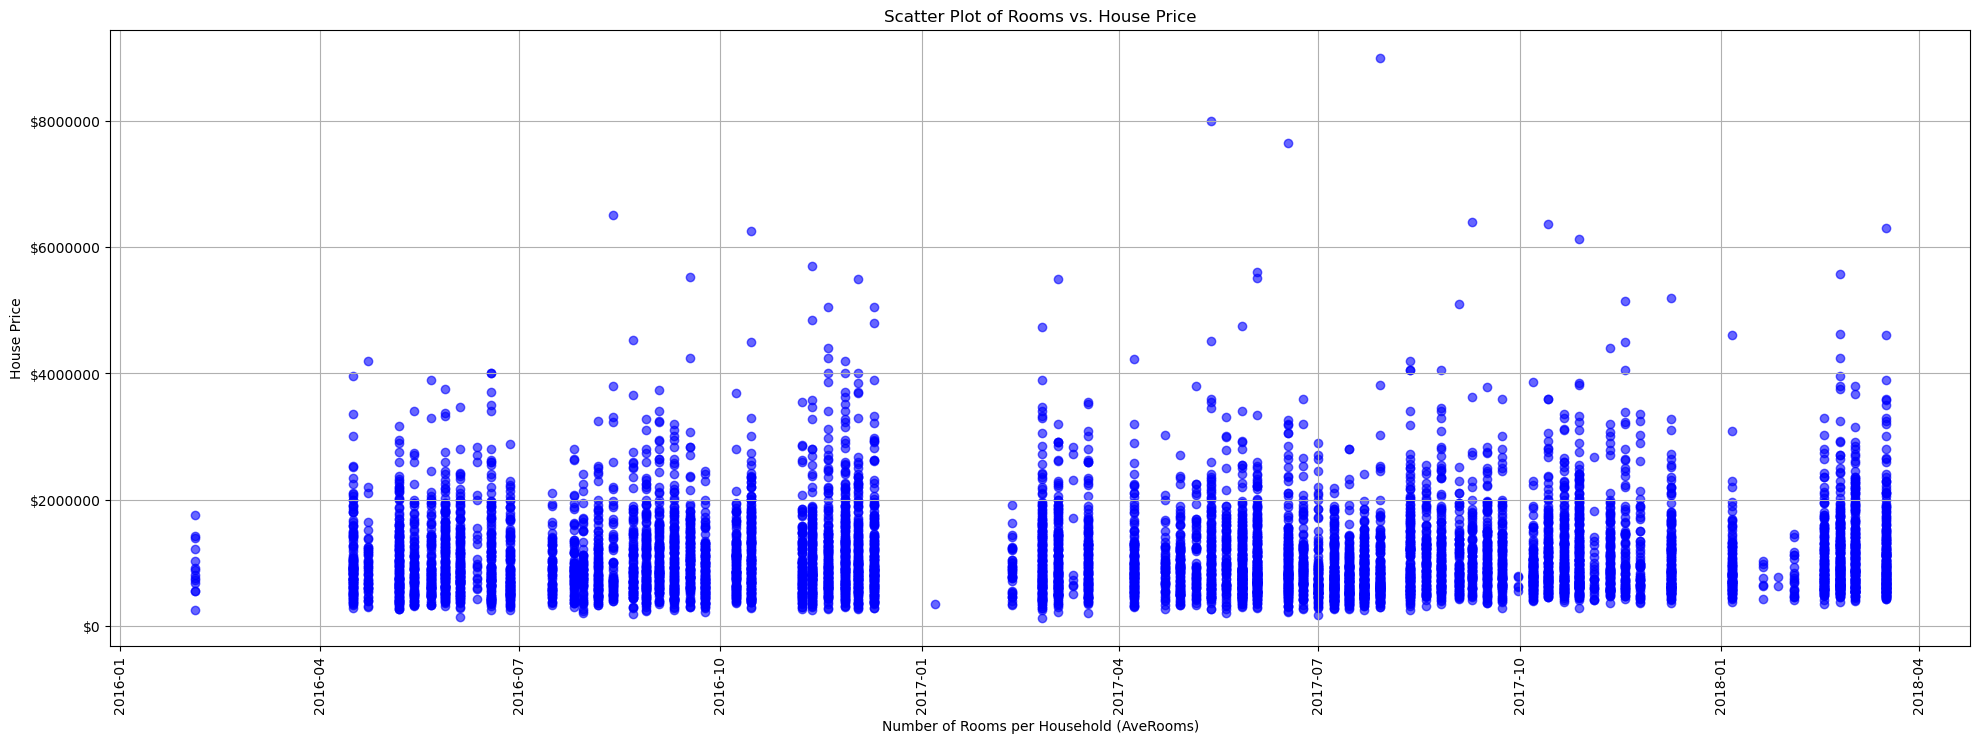

In [724]:
plt.figure(figsize=(24, 8))
plt.scatter(housing_data['Date'], housing_data['Price'], alpha=0.6, color='b')
plt.title('Scatter Plot of Rooms vs. House Price')
plt.xlabel('Number of Rooms per Household (AveRooms)')
plt.ylabel('House Price')
plt.xticks(rotation=90)
plt.grid(True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.show()

            Suburb          Address  Rooms Type    Price Method    SellerG  \
284      Thornbury   3/125 Fyffe St      2    t   805000      S     Nelson   
292         Coburg  8 Watchtower Rd      3    h   675000     PI     Walshe   
291         Ormond    7/30 Walsh St      1    u   250000     VB        Ray   
290         Albion    7 Dalworth St      2    h   765000     SA      Barry   
289    Maribyrnong      6 Kynoch La      3    t   560000     VB     Biggin   
...            ...              ...    ...  ...      ...    ...        ...   
8409   Templestowe    5 Noorilim Cl      3    h  1496000      S  Fletchers   
8410     Mill Park      5 Protea Ct      3    h   620000      S        Ray   
8411     Maidstone       5 Smith St      3    h   830000     VB     Biggin   
8445           Kew      7 Thomas St      4    h  3900000     PI     Jellis   
8389  Williamstown     4 McGuire Cr      3    h  1150000     SP   Williams   

           Date  Distance  Postcode  ...  Bathroom  Car  Landsi

<Axes: xlabel='Date'>

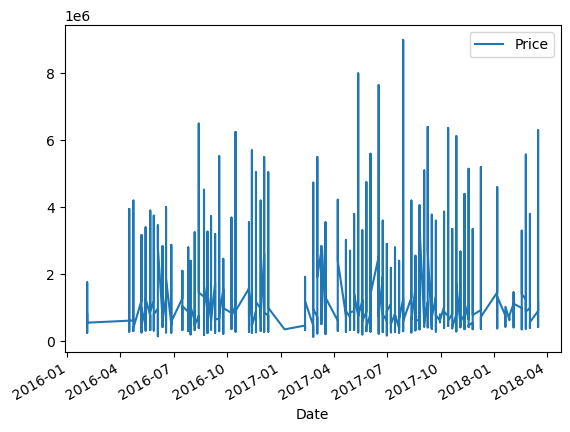

In [725]:
# Drop duplicates based on a specific column
# housing_data = housing_data.drop_duplicates(subset=['Date'])
housing_data = housing_data

housing_data.sort_values(by=['Date'], inplace=True)

print(housing_data)



housing_data.plot.line(y='Price', x='Date')

/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_9441/1377867456.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['${:.0f}'.format(x) for x in current_values])


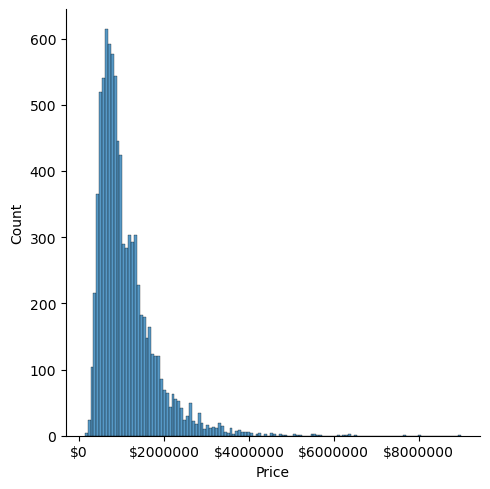

In [726]:
sns.displot(housing_data['Price'])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['${:.0f}'.format(x) for x in current_values])


plt.show()

In [727]:
housing_data = housing_data.join(pd.get_dummies(housing_data.Type)).drop(['Type'], axis=1)

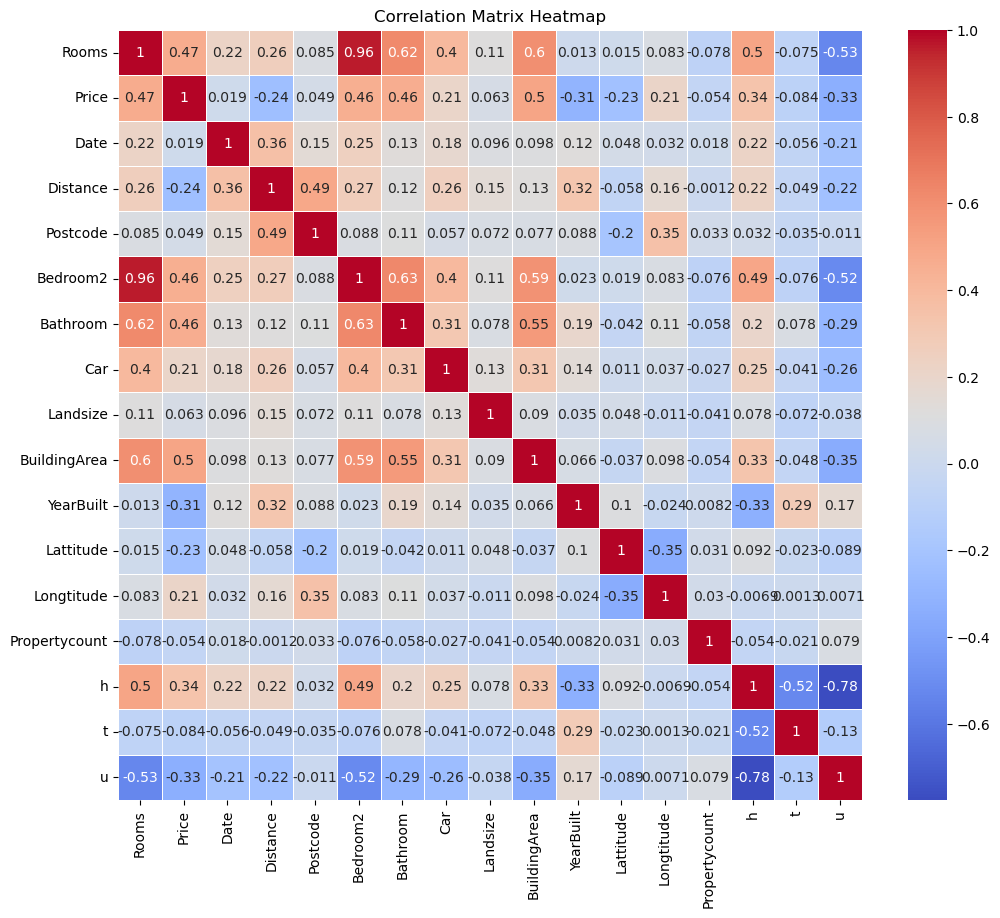

In [728]:
plt.figure(figsize=(12, 10))
housing_data_no_strs = housing_data.drop(['Suburb', 'Address', 'SellerG', 'Method', 'CouncilArea', 'Regionname'],  axis=1)
corr_matrix = housing_data_no_strs.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [729]:
# X = housing_data_no_strs.drop('Price', axis=1)
X = housing_data_no_strs[['Rooms']]
y = housing_data_no_strs['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [730]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [731]:
# Predict the results on the test set
y_pred = model.predict(X_test)

# Print model performance
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print('R^2 Score: %.2f' % r2_score(y_test, y_pred))

Mean Squared Error: 357484393060.82
R^2 Score: 0.23


In [732]:
model.score(X_train, y_train)

0.22164815257876447

In [733]:
model.score(X_test, y_test)

0.22700237844477555

In [734]:
print(X_test.size)
print(y_test.size)

1715
1715


/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_9441/1746071776.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])


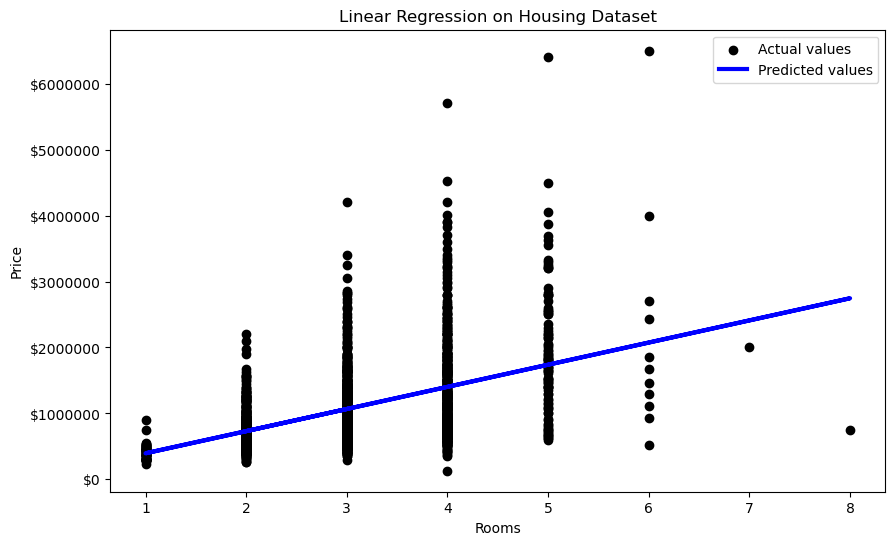

In [735]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual values')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted values')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Linear Regression on Housing Dataset')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.legend()
plt.show()

In [736]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_test, y_test)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [737]:
lasso_reg.score(X_train, y_train)

0.2214887470093082

In [738]:
lasso_reg.score(X_test, y_test)

0.22715852621424948

In [739]:
y_pred = lasso_reg.predict(X_test)

/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_9441/1746071776.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])


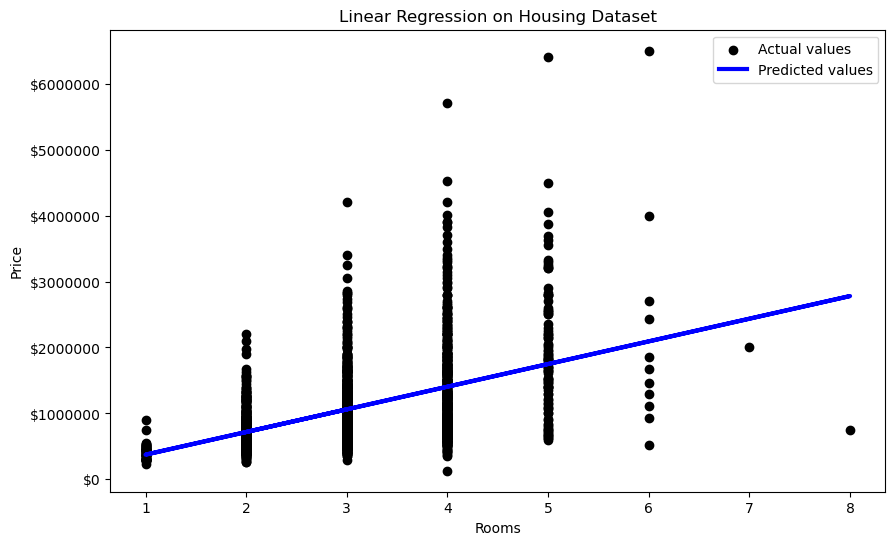

In [740]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual values')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted values')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Linear Regression on Housing Dataset')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.legend()
plt.show()

In [741]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [742]:
ridge_reg.score(X_train, y_train)

0.22163450549137975

In [743]:
ridge_reg.score(X_test, y_test)

0.22691083837852621

In [744]:
y_pred = ridge_reg.predict(X_test)

/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_9441/1746071776.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])


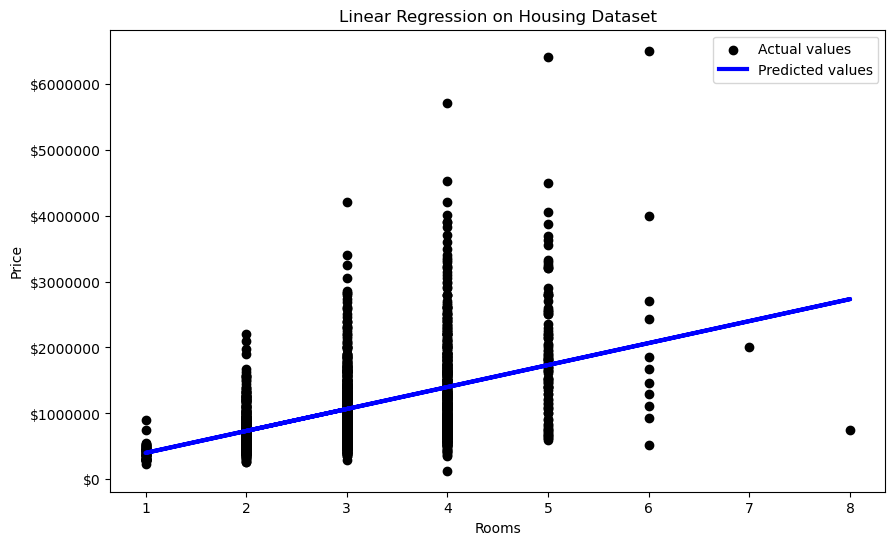

In [745]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual values')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted values')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Linear Regression on Housing Dataset')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.legend()
plt.show()

In [746]:
from sklearn.cluster import KMeans

In [747]:
# Extract feature data and target labels
X = housing_data.Price
X_df = pd.DataFrame(housing_data.Price)
y = housing_data.Rooms
y_df = pd.DataFrame(housing_data.Rooms)

/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_9441/196902678.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])


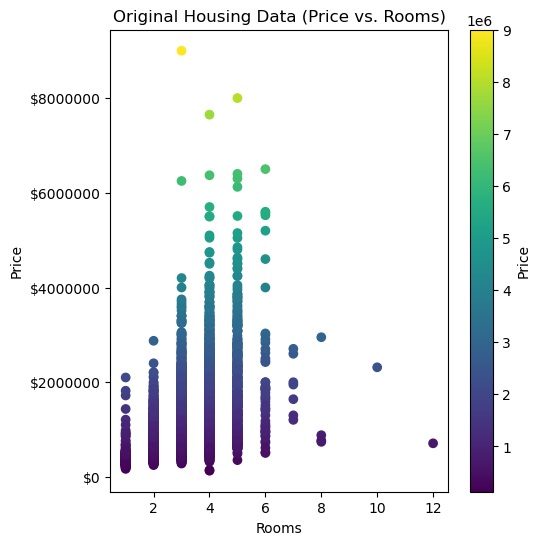

In [748]:
# Plot original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y, X, c=X, cmap='viridis')
plt.title('Original Housing Data (Price vs. Rooms)')
plt.xlabel('Rooms')
plt.ylabel('Price')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.colorbar(label='Price')
plt.show()

In [756]:
cluster_model = KMeans(n_clusters=5, random_state=42)
cluster_model.fit(X_df)


KeyError: 'Price'

In [750]:
# Predict all 150 data points
all_predictions = cluster_model.predict(X_df)

/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_9441/3669926176.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])


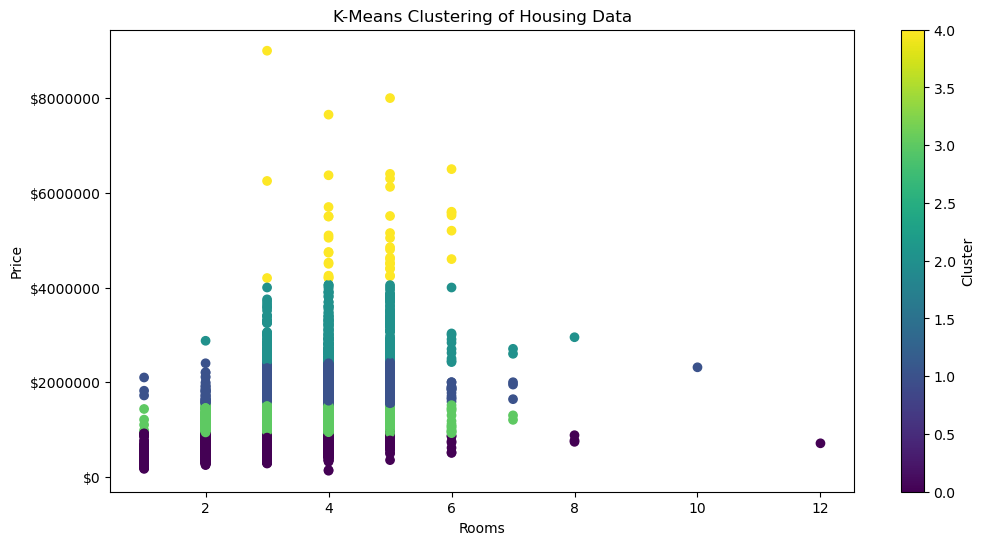

In [752]:
# Plot clustering results
plt.figure(figsize=(12, 6))
plt.scatter(y, X, c=all_predictions, cmap='viridis')
plt.title('K-Means Clustering of Housing Data')
plt.xlabel('Rooms')
plt.ylabel('Price')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.colorbar(label='Cluster')
plt.show()